In [1]:
import lec
import xarray
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

vmecOutput = "./../testField/wout_DIII-D.nc" 
surf = lec.Surface.readVMECOutput(vmecOutput)
iota = float(xarray.open_dataset(vmecOutput)["iotas"].values[-1])

In [2]:
eqDIIID = lec.SurfaceEquilibrium(surf=surf, iota=iota)

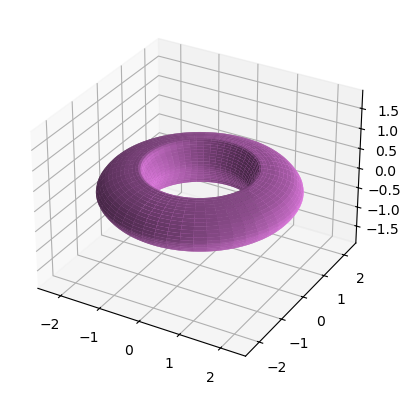

In [3]:
_thetaArr = np.linspace(0, 2*np.pi, 100)
_zetaArr = np.linspace(0, 2*np.pi, 200)
thetaArr, zetaArr = np.meshgrid(_thetaArr, _zetaArr)
rArr = eqDIIID.surf.r.getValue(thetaArr, zetaArr)
xArr = rArr * np.cos(zetaArr)
yArr = rArr * np.sin(zetaArr)
zArr = eqDIIID.surf.z.getValue(thetaArr, zetaArr)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(xArr, yArr, zArr, color="violet")
_ = plt.axis("equal")

In [4]:
eqDIIID.run()

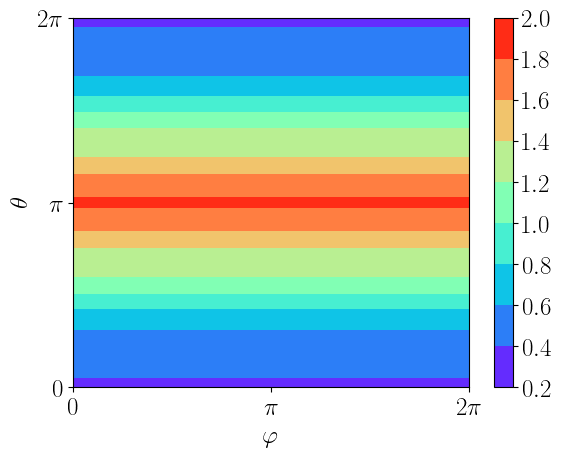

In [5]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
eqDIIID.Jacobian.plot_plt(ax=ax, fig=fig)

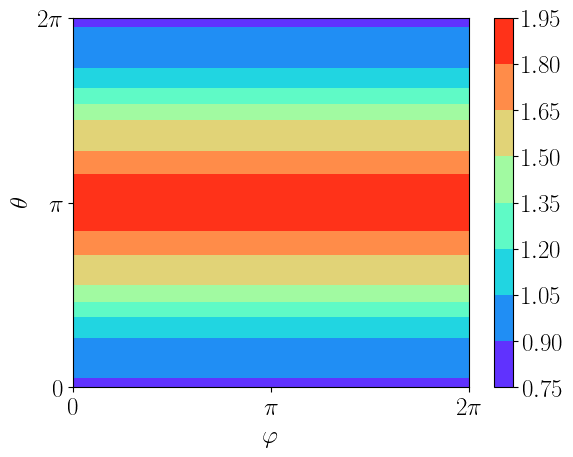

In [6]:
fig, ax = plt.subplots()
eqDIIID.plotB(ax=ax, fig=fig)